In [81]:
# !python -m pip install scipy opencv-python

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.9/53.9 MB 10.3 MB/s eta 0:00:0000:0100:01
You should consider upgrading via the '/opt/local/bin/python -m pip install --upgrade pip' command.


In [83]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

from skimage.io import imread, imshow, imsave
from skimage import data, img_as_float

In [257]:
emap = lambda f, xs: [f(x) for x in xs]
unzip = lambda xs: [[a for a, _ in xs], [b for _, b in xs]]

def save(pics, suffix='', path='./', ext='gif'):
    for n, p in enumerate(pics):
        imsave(path + f'{n+1:02d}{suffix}.{ext}', p)

show1 = lambda pic: (plt.subplots())[1].imshow(pic, cmap='gray')        

def show(pics, title=None):
    cols, rows = 2, (len(pics) // 2) + (len(pics) % 2)
    fig, axs = plt.subplots(rows, cols, squeeze=True, constrained_layout=True)
    show1 = lambda pic, ax: ax.imshow(pic, cmap='gray')
    [show1(pic, ax) for pic, ax in zip(pics, axs.flat)]

def square_wave(period, w=200, h=200):
    freq = w // period
    tile = np.repeat((0.0, 1.0), freq // 2)
    line = np.tile(tile, period)
    pic = np.repeat(line, h).reshape(w, h).T
    print(f"Период: {period} пк, полоса: {freq // 2} пк")
    return pic

Период: 25 пк, полоса: 4 пк


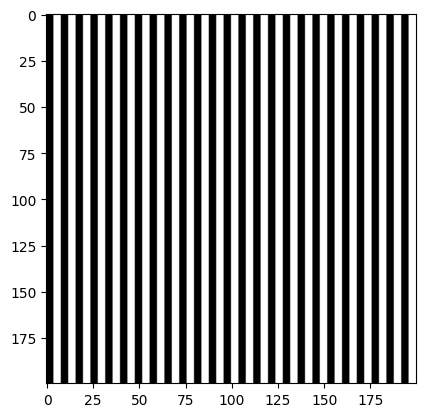

In [258]:
pic = square_wave(25)
show1(pic)

In [163]:
def blur(pic, x, y):
    f = lambda x, y: np.ones((x, y)) / (x * y)
    return sp.signal.convolve2d(pic, f(x, y))

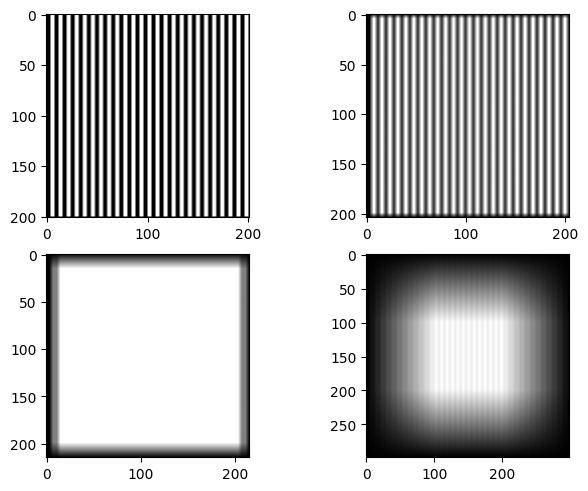

In [259]:
blurred = [blur(pic, x, x) for x in (2, 5, 16, 100)]
show(blurred)

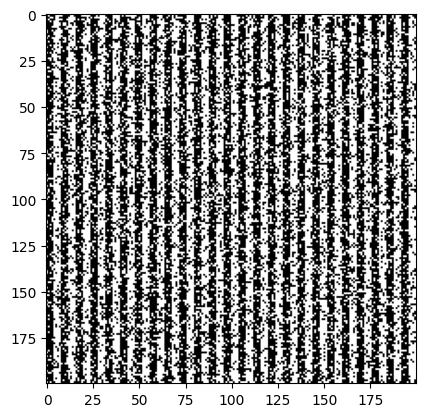

In [260]:
uint8 = lambda x: x.astype(np.uint8)
float32 = lambda x: x.astype(np.float32)

def noise(pic, p):
    mask = np.random.choice((0, 255), size=pic.shape, p=(1-p, p))
    noised = uint8(pic) * 255 ^ mask
    return float32(noised // 255)

noisy = noise(pic, .20)
show1(noisy)

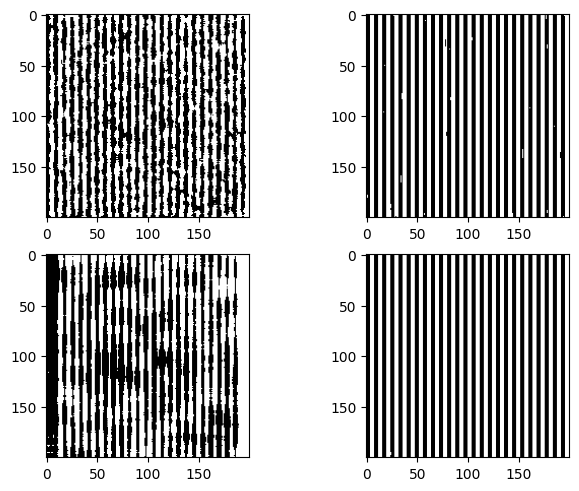

In [255]:
mf = lambda a, b: sp.ndimage.median_filter(noisy, size=(a, b))
mf = [mf(a, b) for a, b in ((5, 5), (20, 1), (20, 20), (40, 1))]
show(mf)

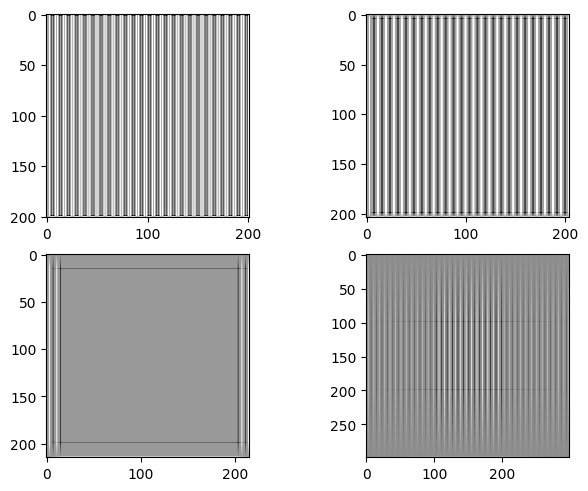

In [263]:
laplaced = [sp.ndimage.laplace(p) for p in blurred]
show(laplaced)